In [ ]:
import os
path = './' + "kmrd"
!cd $path

if not os.path.exists(path):
    !git clone https://github.com/lovit/kmrd
    !python setup.py install
else:
     print("data and path already exists!")

In [1]:
import pandas as pd
import matplotlib

In [2]:
from kmrd.kmr_dataset import load_rates
from kmrd.kmr_dataset import get_paths

paths = get_paths(size='2m')
rates, timestamps = load_rates(size='2m')

skip 44048 lines which are duplicated (user, item), #uniques=2570549


In [3]:
path = './kmrd/kmr_dataset/datafile/kmrd-small/'
casting_df = pd.read_csv(path+'castings.csv',encoding='cp949')
print(casting_df.shape)
print(casting_df.info())
casting_df.head()

(9776, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9776 entries, 0 to 9775
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movie    9776 non-null   int64
 1   people   9776 non-null   int64
 2   order    9776 non-null   int64
 3   leading  9776 non-null   int64
dtypes: int64(4)
memory usage: 305.6 KB
None


,movie,people,order,leading
0,10001,4374,1,1
1,10001,178,2,1
2,10001,3241,3,1
3,10001,47952,4,1
4,10001,47953,5,0


In [4]:
countries_df = pd.read_csv(path+'countries.csv', encoding='utf-8')
print(countries_df.shape)
print(countries_df.info())
countries_df.head()

(1109, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movie    1109 non-null   int64 
 1   country  1109 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.5+ KB
None


,movie,country
0,10001,이탈리아
1,10001,프랑스
2,10002,미국
3,10003,미국
4,10004,미국


In [5]:
genres_df = pd.read_csv(path+'genres.csv', encoding='utf-8')
print(genres_df.shape)
print(genres_df.info())
genres_df.head()

(2025, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   movie   2025 non-null   int64 
 1   genre   2025 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.8+ KB
None


,movie,genre
0,10001,드라마
1,10001,멜로/로맨스
2,10002,SF
3,10002,코미디
4,10003,SF


In [6]:
movies_df = pd.read_csv(path+'movies.txt', sep='\t', encoding='utf-8')
print(movies_df.shape)
print(movies_df.info())
movies_df.head()

(999, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      999 non-null    int64  
 1   title      992 non-null    object 
 2   title_eng  991 non-null    object 
 3   year       609 non-null    float64
 4   grade      957 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.1+ KB
None


,movie,title,title_eng,year,grade
0,10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가
1,10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가
2,10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가
3,10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가
4,10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG


In [7]:
peoples_df = pd.read_csv(path+'peoples.txt', sep='\t', encoding='utf-8')
print(peoples_df.shape)
print(peoples_df.info())
peoples_df.head()

(7172, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   people    7172 non-null   int64 
 1   korean    7172 non-null   object
 2   original  6305 non-null   object
dtypes: int64(1), object(2)
memory usage: 168.2+ KB
None


,people,korean,original
0,5,아담 볼드윈,Adam Baldwin
1,8,애드리안 라인,Adrian Lyne
2,9,에이단 퀸,Aidan Quinn
3,13,구로사와 아키라,Akira Kurosawa
4,15,알 파치노,Al Pacino


### Genre dataset

In [8]:
group_genre = genres_df.groupby('movie')
genres = [(list(set(x['movie'].values))[0], '/'.join(x['genre'].values)) for _, x in group_genre]
combined_genres_df = pd.DataFrame(data=genres, columns=['movie', 'genres'])
combined_genres_df = combined_genres_df.set_index('movie')
combined_genres_df.head()

,genres
movie,
10001,드라마/멜로/로맨스
10002,SF/코미디
10003,SF/코미디
10004,서부/SF/판타지/코미디
10005,판타지/모험/SF/액션


In [9]:
movies_df = movies_df.set_index('movie')
movies_df.head()

,title,title_eng,year,grade
movie,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG


In [10]:
movies_df = pd.concat([movies_df, combined_genres_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres
movie,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마/멜로/로맨스
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가,SF/코미디
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가,SF/코미디
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가,서부/SF/판타지/코미디
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG,판타지/모험/SF/액션


### People & Casting dataset

In [11]:
castings = [(list(set(x['movie'].values))[0], x['people'].values) for index, x in casting_df.groupby('movie')]
combined_castings_df = pd.DataFrame(data=castings, columns=['movie','people'])
combined_castings_df = combined_castings_df.set_index('movie')
combined_castings_df.head()

,people
movie,
10001,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ..."
10002,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]"
10003,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,..."
10004,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1..."
10005,"[1007, 535, 215, 1236, 35]"


In [12]:
movies_df = pd.concat([movies_df, combined_castings_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres,people
movie,,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마/멜로/로맨스,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ..."
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]"
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,..."
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가,서부/SF/판타지/코미디,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1..."
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG,판타지/모험/SF/액션,"[1007, 535, 215, 1236, 35]"


### Countries dataset

In [13]:
groups = countries_df.groupby('movie')
countries = [(list(set(x['movie'].values))[0], ','.join(x['country'].values)) for index, x in groups][:10]
combined_countries_df = pd.DataFrame(data=countries, columns=['movie', 'country'])
combined_countries_df = combined_countries_df.set_index('movie')
combined_countries_df.head()

,country
movie,
10001,"이탈리아,프랑스"
10002,미국
10003,미국
10004,미국
10005,미국


In [14]:
movies_df = pd.concat([movies_df, combined_countries_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres,people,country
movie,,,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",1990,전체 관람가,드라마/멜로/로맨스,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ...","이탈리아,프랑스"
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",1987,12세 관람가,SF/코미디,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]",미국
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",1990,12세 관람가,SF/코미디,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,...",미국
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990,전체 관람가,서부/SF/판타지/코미디,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1...",미국
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1978,PG,판타지/모험/SF/액션,"[1007, 535, 215, 1236, 35]",미국


In [14]:
movies_df.to_csv('./kmrd/kmr_dataset/datafile/kmrd-small/movie_info.csv')

### Rating dataset

In [15]:
rating_df = pd.read_csv(path+'rates.csv')
print(rating_df.shape)
print(rating_df.info())
rating_df.head()

(140710, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140710 entries, 0 to 140709
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   user    140710 non-null  int64
 1   movie   140710 non-null  int64
 2   rate    140710 non-null  int64
 3   time    140710 non-null  int64
dtypes: int64(4)
memory usage: 4.3 MB
None


,user,movie,rate,time
0,0,10003,7,1494128040
1,0,10004,7,1467529800
2,0,10018,9,1513344120
3,0,10021,9,1424497980
4,0,10022,7,1427627340


In [16]:
n_unique_users = len(rating_df['user'].unique())
print(n_unique_users)

52028


In [17]:
n_unique_users = len(rating_df['movie'].unique())
print(n_unique_users)

600


In [18]:
print('평점의 평균: ', rating_df['rate'].mean())
print('평점의 표준편차: ', rating_df['rate'].std())

평점의 평균:  8.953258474877407
평점의 표준편차:  2.1060471738510547


In [19]:
rating_df.isnull().sum()

user     0
movie    0
rate     0
time     0
dtype: int64

array([[<Axes: title={'center': 'user'}>,
        <Axes: title={'center': 'movie'}>],
       [<Axes: title={'center': 'rate'}>, <Axes: >]], dtype=object)

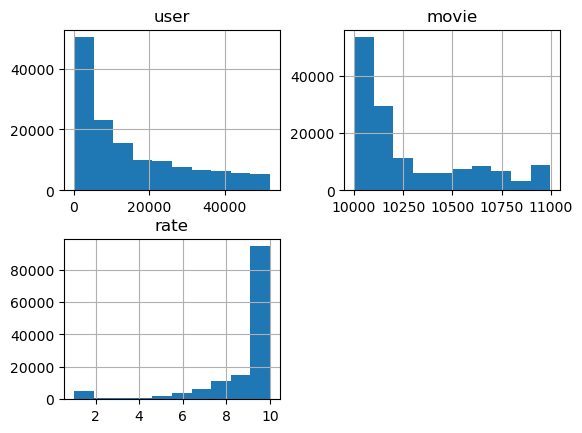

In [20]:
rating_df[['user','movie','rate']].hist()

In [21]:
stats_df = rating_df.groupby('user').agg({'movie':'count', 'rate':['mean','std']}).reset_index()
stats_df.columns = ['user', 'movie_cnt','rate_avg','rate_std']
stats_df.head()

,user,movie_cnt,rate_avg,rate_std
0,0,85,7.388235,1.337144
1,1,1,9.000000,NaN
2,2,15,7.733333,1.869556
3,3,92,7.413043,1.638494
4,4,71,6.760563,2.338893


In [22]:
stats_df.sort_values(by='movie_cnt', ascending=False)

,user,movie_cnt,rate_avg,rate_std
465,465,413,9.176755,1.570431
44,44,375,9.280000,1.652740
1051,1051,322,7.447205,1.446451
170,170,278,8.597122,2.441280
110,110,262,7.790076,2.554730
...,...,...,...,...
24793,24793,1,10.000000,NaN
24794,24794,1,10.000000,NaN
24796,24796,1,10.000000,NaN
24797,24797,1,9.000000,NaN


In [23]:
stats_df['movie_cnt'].describe()

count    52028.000000
mean         2.704505
std          8.010124
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        413.000000
Name: movie_cnt, dtype: float64

count    905.000000
mean       9.048619
std        1.935881
min        1.000000
25%        9.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: rate, dtype: float64


<Axes: >

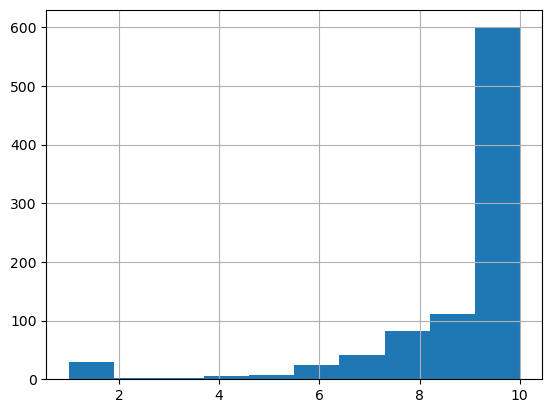

In [24]:
# rating distribution for a movie
print(rating_df[rating_df['movie']==10005]['rate'].describe())
rating_df[rating_df['movie']==10005]['rate'].hist()